In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# dateparse('1962-01')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<ipython-input-6-f468c0f22808>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [10]:
ts['1949-01-01']

112

In [11]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [12]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

# Get range

In [13]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [15]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Check for stationarity

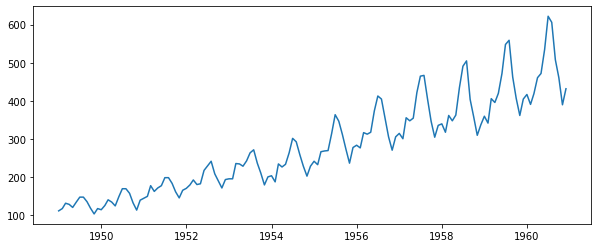

In [16]:
plt.figure(figsize=(10,4))
plt.plot(ts)

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-Fuller test:
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '%Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

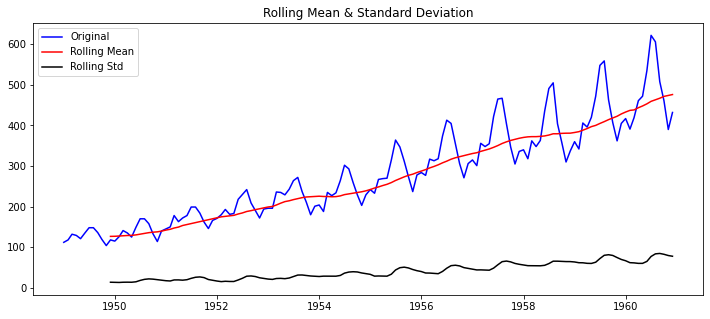

Result of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
%Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [18]:
test_stationarity(ts)

# Making TS Stationary

# Estimating & Eliminating Trend

In [19]:
ts_log = np.log(ts)
print(ts_log, ts)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64 Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


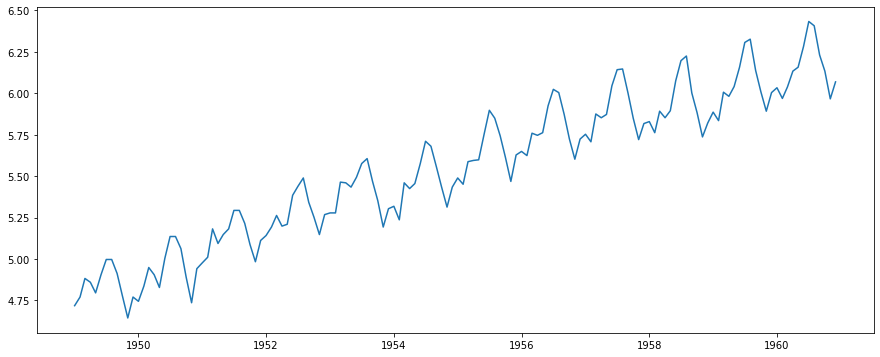

In [20]:
plt.plot(ts_log)

# Smoothing:

# Moving average

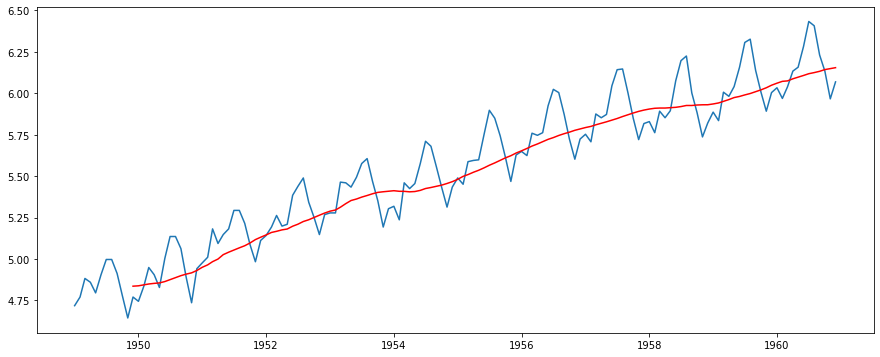

In [21]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [23]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

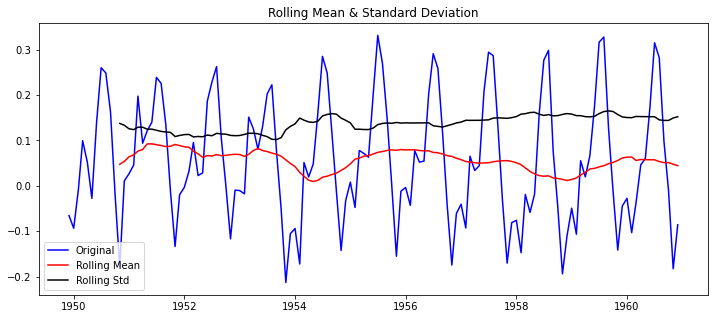

Result of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
%Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [24]:
test_stationarity(ts_log_moving_avg_diff)

# Exponentially Weighted Moving Average

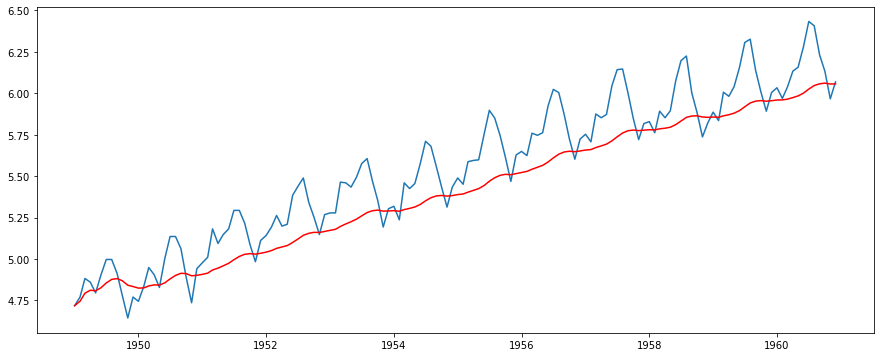

In [25]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [26]:
expwighted_avg, ts_log

(Month
 1949-01-01    4.718499
 1949-02-01    4.745345
 1949-03-01    4.793835
 1949-04-01    4.811785
 1949-05-01    4.808206
                 ...   
 1960-08-01    6.046445
 1960-09-01    6.056778
 1960-10-01    6.061079
 1960-11-01    6.055750
 1960-12-01    6.056461
 Name: #Passengers, Length: 144, dtype: float64,
 Month
 1949-01-01    4.718499
 1949-02-01    4.770685
 1949-03-01    4.882802
 1949-04-01    4.859812
 1949-05-01    4.795791
                 ...   
 1960-08-01    6.406880
 1960-09-01    6.230481
 1960-10-01    6.133398
 1960-11-01    5.966147
 1960-12-01    6.068426
 Name: #Passengers, Length: 144, dtype: float64)

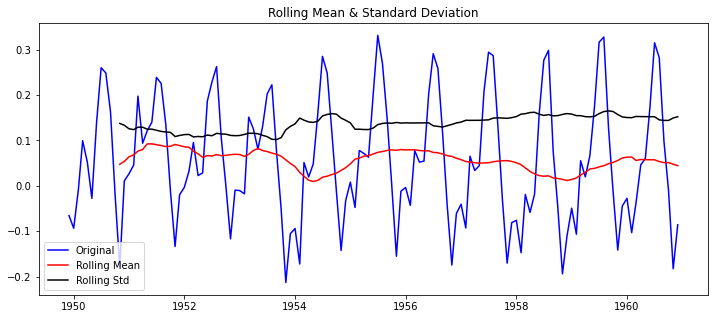

Result of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
%Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_moving_avg_diff)

# Eliminating Trend and Seasonality

# Differencing:

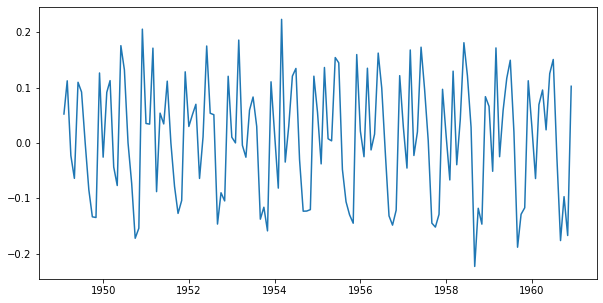

In [28]:
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [29]:
ts_log.shift(), ts_log

(Month
 1949-01-01         NaN
 1949-02-01    4.718499
 1949-03-01    4.770685
 1949-04-01    4.882802
 1949-05-01    4.859812
                 ...   
 1960-08-01    6.432940
 1960-09-01    6.406880
 1960-10-01    6.230481
 1960-11-01    6.133398
 1960-12-01    5.966147
 Name: #Passengers, Length: 144, dtype: float64,
 Month
 1949-01-01    4.718499
 1949-02-01    4.770685
 1949-03-01    4.882802
 1949-04-01    4.859812
 1949-05-01    4.795791
                 ...   
 1960-08-01    6.406880
 1960-09-01    6.230481
 1960-10-01    6.133398
 1960-11-01    5.966147
 1960-12-01    6.068426
 Name: #Passengers, Length: 144, dtype: float64)

<Figure size 8064x432 with 0 Axes>

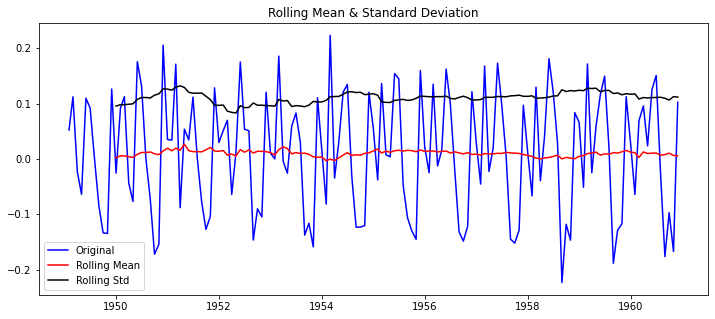

Result of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
%Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [30]:
plt.figure(figsize=(112,6))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposition:

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

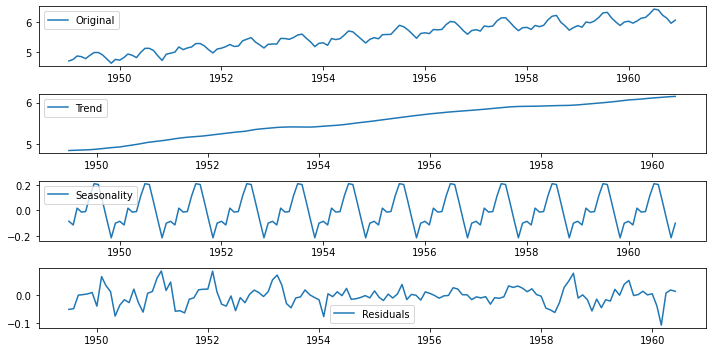

In [32]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

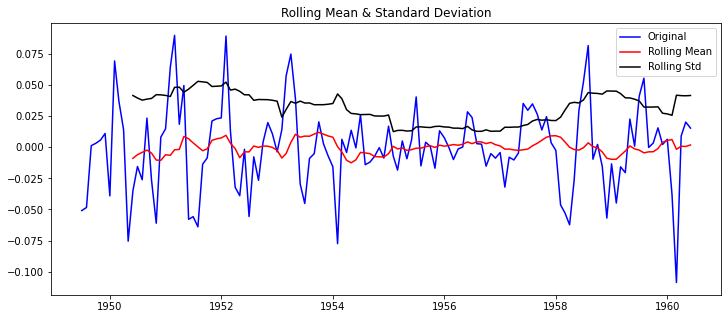

Result of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
%Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [33]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [34]:
from statsmodels.tsa.arima_model import ARIMA

# ACF & PACF Plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


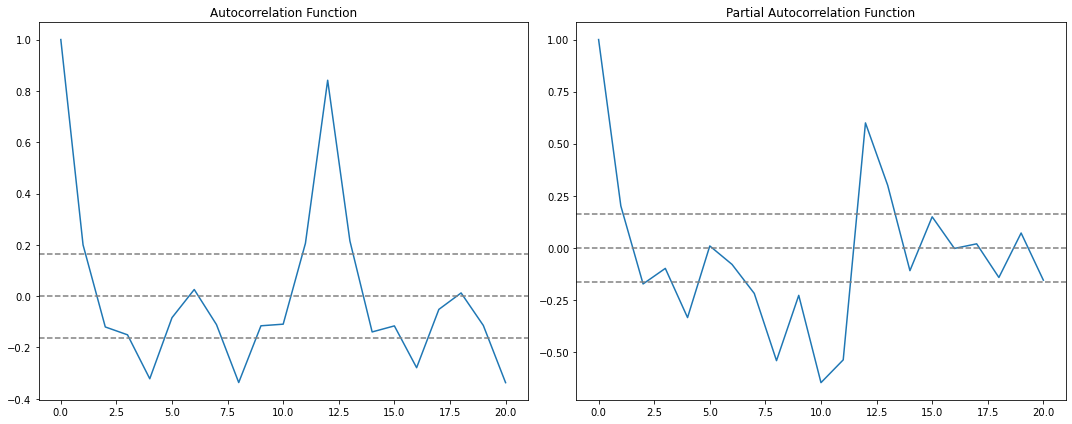

In [35]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#plot Acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# AR Model:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.5023')

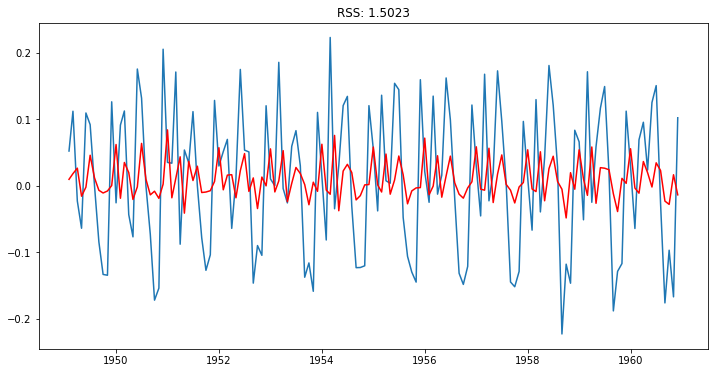

In [36]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.1753')

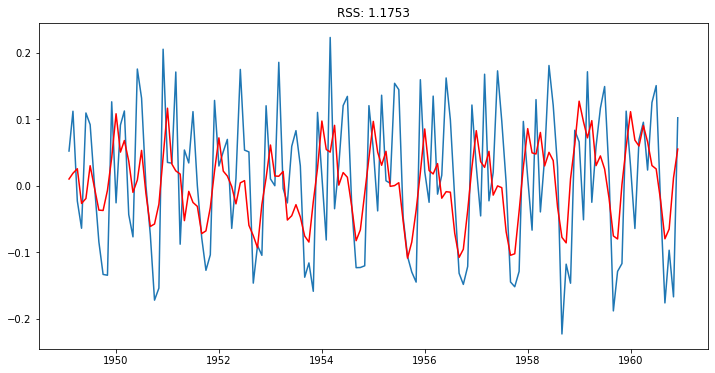

In [37]:
model = ARIMA(ts_log, order=(2,1,1))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.4721')

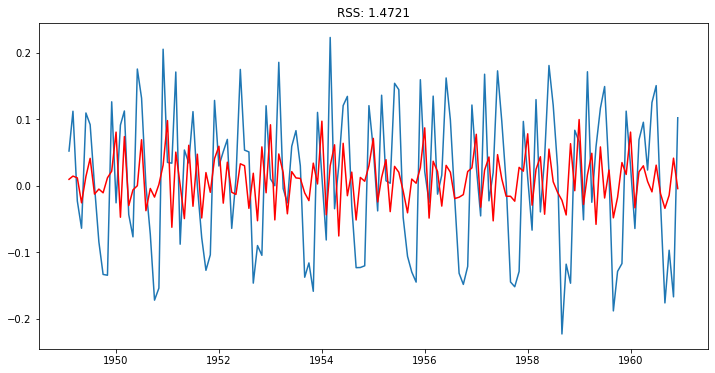

In [38]:
model = ARIMA(ts_log, order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Text(0.5, 1.0, 'RSS: 1.0292')

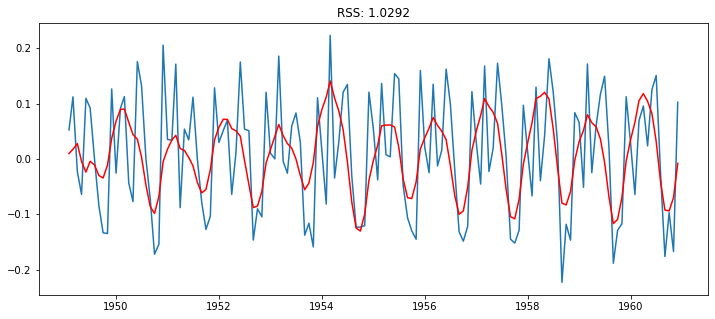

In [39]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Convert to original scale:

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [41]:
predictions_ARIMA_diff_consum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_consum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [44]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_consum)
predictions_ARIMA_log.head()

Month
1949-01-01         NaN
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [45]:
predictions_ARIMA_log.head(10)

Month
1949-01-01         NaN
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665109
dtype: float64

In [46]:
ts_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

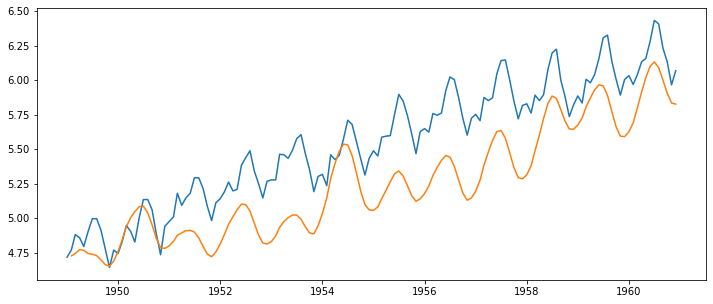

In [47]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: nan')

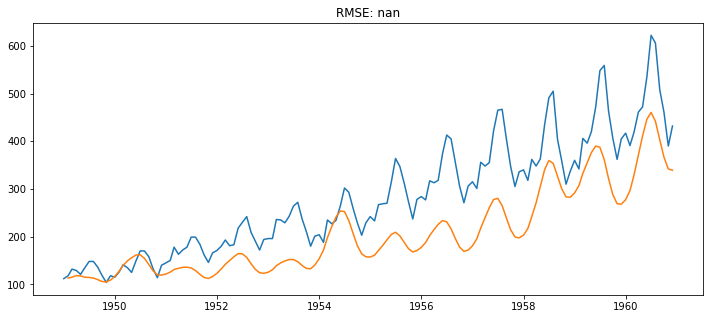

In [50]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f' %np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [51]:
predictions_ARIMA

Month
1949-01-01           NaN
1949-02-01    113.078122
1949-03-01    115.073413
1949-04-01    118.301983
1949-05-01    117.768359
                 ...    
1960-08-01    441.885697
1960-09-01    402.905223
1960-10-01    366.752873
1960-11-01    341.984228
1960-12-01    339.216256
Length: 144, dtype: float64

In [52]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


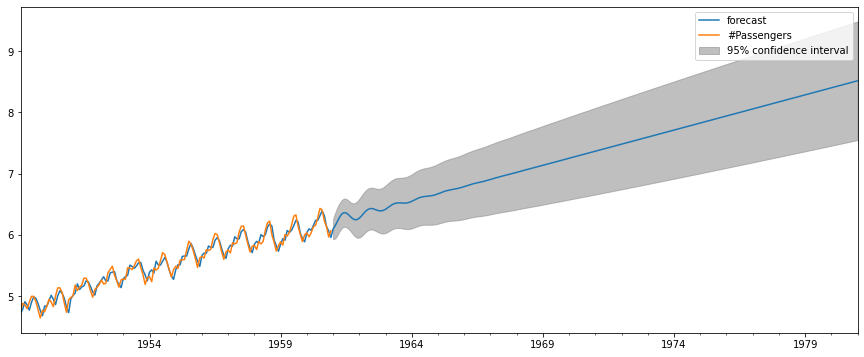

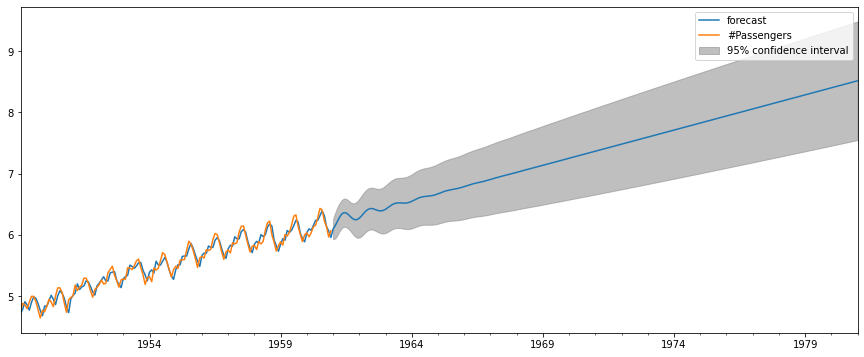

In [53]:
results_ARIMA.plot_predict(1, 384)

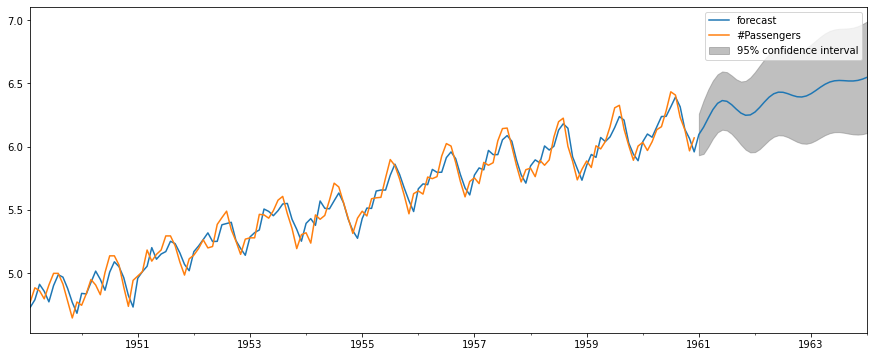

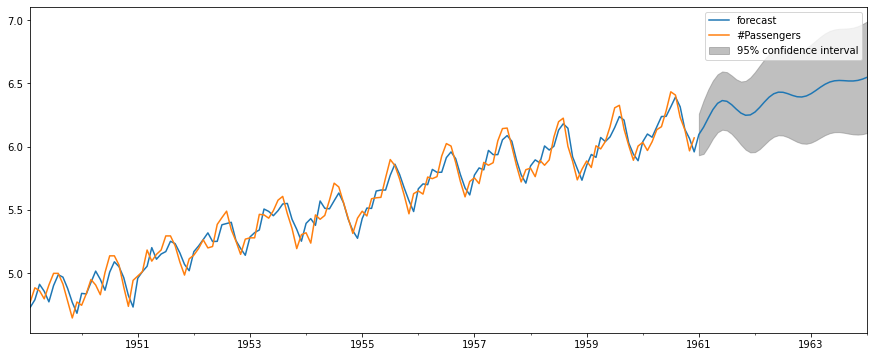

In [54]:
results_ARIMA.plot_predict(1, 180)